# SHAP Interaction
Using the SHAP python package to identify interactions in data
<br>
<b>Dataset:<b> https://www.kaggle.com/conorsully1/interaction-dataset

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

import shap
shap.initjs()

path = "/Users/conorosully/Google Drive/My Drive/Medium/SHAP Interactions/Figures/{}"

## Dataset

In [3]:
#import dataset
data = pd.read_csv("../data/interaction_dataset.csv",sep='\t')

y = data['bonus']
X = data.drop('bonus', axis=1)

print(len(data))
data.head()

1000


,experience,degree,performance,sales,days_late,bonus
0,31,1,6.11,29,14,197
1,35,1,9.55,44,8,314
2,9,1,2.64,26,20,88
3,40,1,0.22,13,7,233
4,18,1,6.46,11,13,108


## Modelling

In [5]:
#Train model
model = xgb.XGBRegressor(objective="reg:squarederror",max_depth=3) 
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

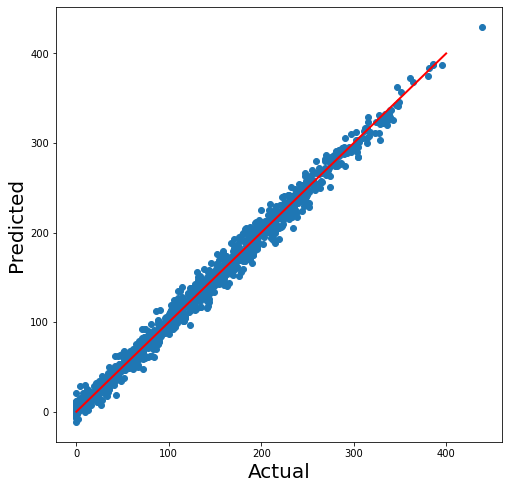

In [7]:
#Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 400], [0, 400], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

plt.savefig(path.format('regression_evaluation.png'),dpi=200,bbox_inches='tight', facecolor='white')

## SHAP interaction values

In [8]:
#Get SHAP interaction values
explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [9]:
#Get shape of interaction values
print(np.shape(shap_interaction))

# SHAP interaction values for first employee
pd.DataFrame(shap_interaction[0],index=X.columns,columns=X.columns)

(1000, 5, 5)


,experience,degree,performance,sales,days_late
experience,35.986313,6.878506,2.198045,2.251103,0.154968
degree,6.878510,28.838484,0.912537,1.555352,0.003096
performance,2.198053,0.912537,9.355861,-4.377119,-0.056362
sales,2.251099,1.555353,-4.377119,-30.095583,0.455547
days_late,0.154970,0.003096,-0.056365,0.455547,-4.060988


In [10]:
#Get model predictions
y_pred = model.predict(X)

#Calculate mean prediction 
mean_pred = np.mean(y_pred)

#Sum of interaction values for first employee
sum_shap = np.sum(shap_interaction[0])

print("Model prediction: {}".format(y_pred[0]))
print("Mean prediction + interaction values: {}".format(mean_pred+sum_shap))

print(mean_pred, sum_shap)

Model prediction: 208.9059600830078
Mean prediction + interaction values: 208.9059295654297
148.9305 59.975433


### Absolute mean

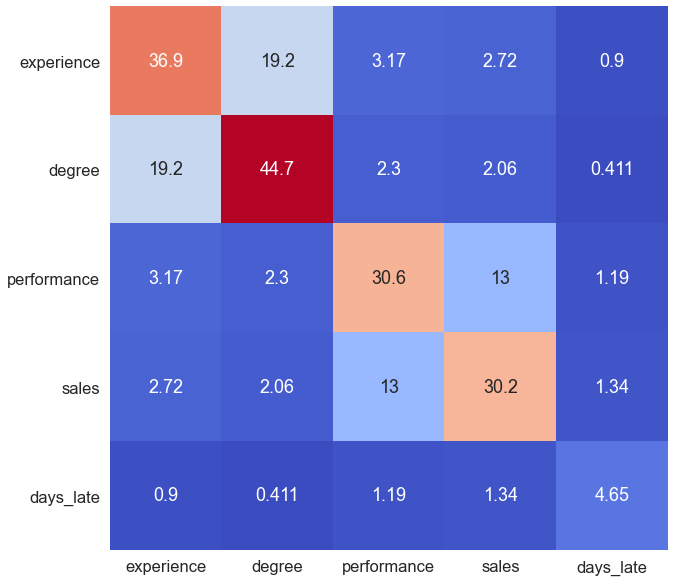

In [47]:
# Get absolute mean of matrices
mean_shap = np.abs(shap_interaction).mean(0)
df = pd.DataFrame(mean_shap,index=X.columns,columns=X.columns)

# times off diagonal by 2
df.where(df.values == np.diagonal(df),df.values*2,inplace=True)

# display 
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(df,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
plt.yticks(rotation=0) 

plt.savefig(path.format('abs_mean_shap.png'),dpi=200,bbox_inches='tight')

### Summary Plot

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


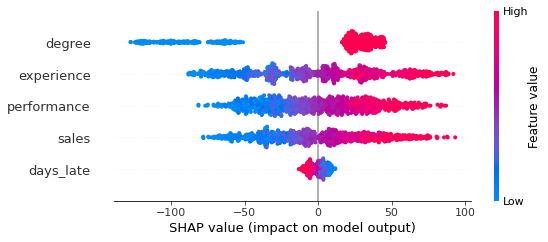

In [11]:
# Get SHAP values
shap_values = explainer(X)

#Display beeswarm plot
shap.plots.beeswarm(shap_values,show=False)

plt.savefig(path.format('beeswarm.png'),dpi=200,bbox_inches='tight', facecolor='white')


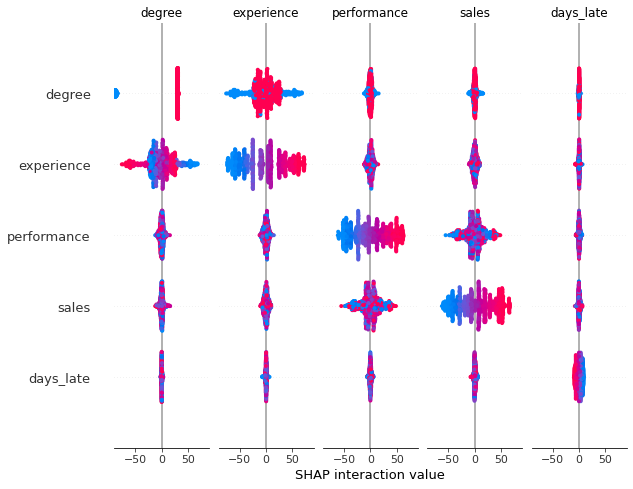

In [12]:
#Display summary plot
shap.summary_plot(shap_interaction, X,show=False)

plt.savefig(path.format('summary.png'),dpi=200,bbox_inches='tight', facecolor='white')

### Dependence plot

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


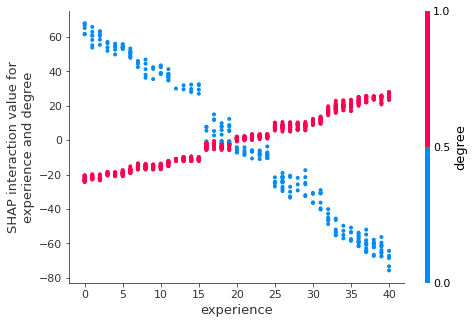

In [13]:
# Experience-degree depenence plot
shap.dependence_plot(
    ("experience", "degree"),
    shap_interaction, X,
    display_features=X,show=False)

plt.savefig(path.format('exp_degree_dependence.png'),dpi=200,bbox_inches='tight', facecolor='white')

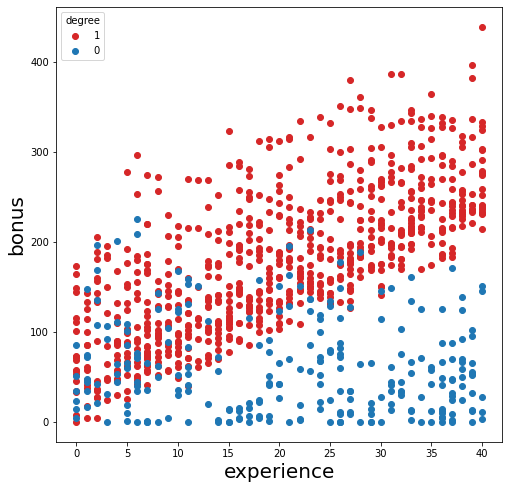

In [14]:
#Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))


plt.scatter('experience','bonus',data=data[data.degree==1],c='#D62728',label='1')
plt.scatter('experience','bonus',data=data[data.degree==0],c='#1F77B4',label='0')

plt.ylabel('bonus',size=20)
plt.xlabel('experience',size=20)
plt.legend(title='degree',fontsize=10)

plt.savefig(path.format('experience_degree_scatter.png'),dpi=200,bbox_inches='tight', facecolor='white')

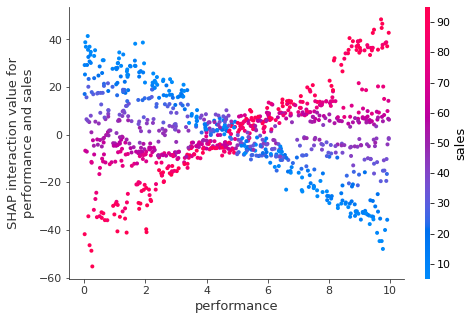

In [15]:
shap.dependence_plot(
    ("performance", "sales"),
    shap_interaction, X,
    display_features=X,show=False)

plt.savefig(path.format('perf_sales_dependence.png'),dpi=200,bbox_inches='tight', facecolor='white')